In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


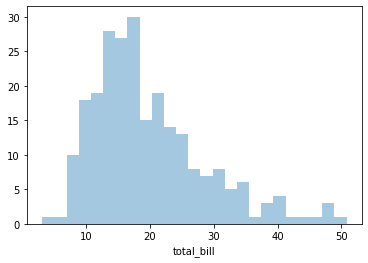

In [11]:
sns.distplot(tips['total_bill'],kde=False,bins=25)

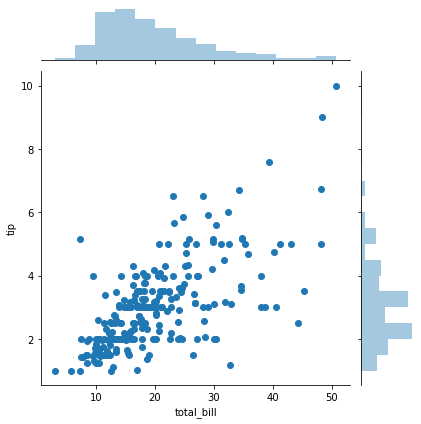

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips) #hex,reg,kde

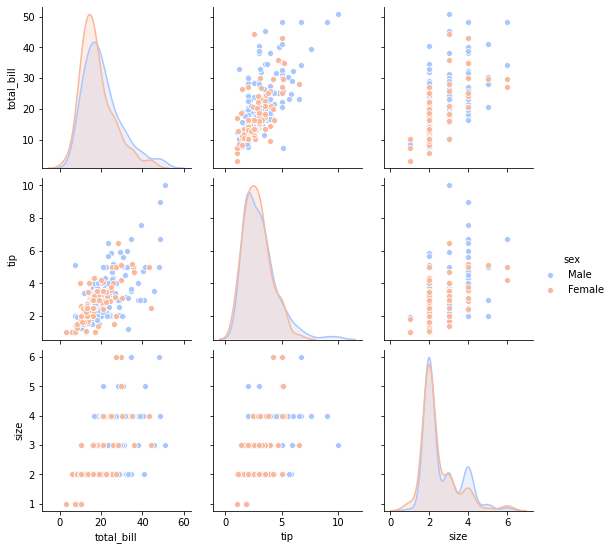

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

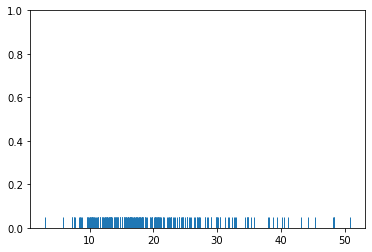

In [24]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

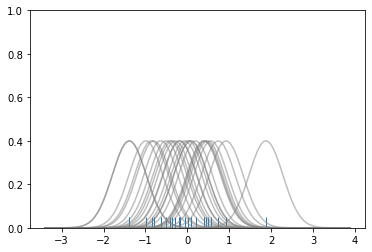

In [25]:
#kernel density estimation
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

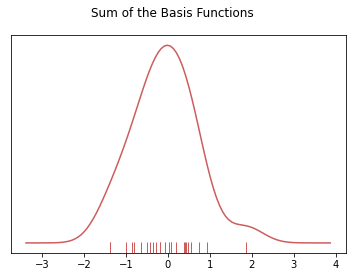

In [26]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

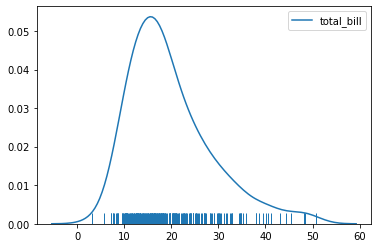

In [27]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

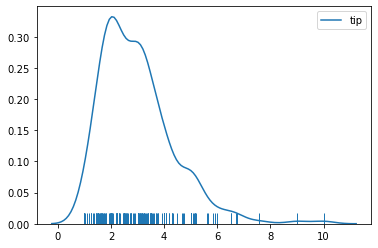

In [28]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

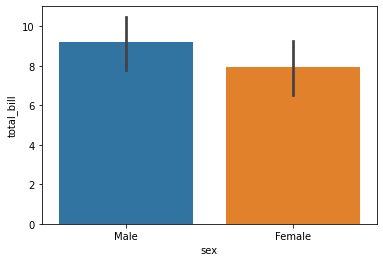

In [33]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

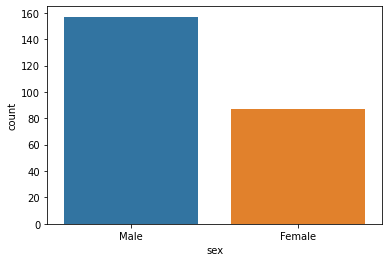

In [34]:
sns.countplot(x='sex',data=tips)

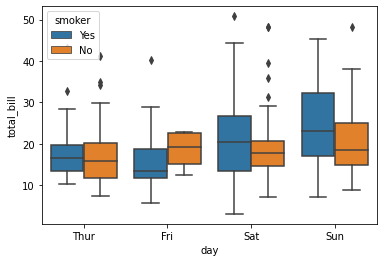

In [37]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

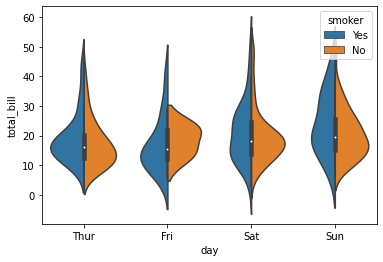

In [39]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

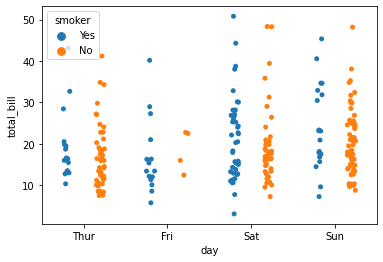

In [45]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='smoker',jitter=True,dodge=True) #dodge == split

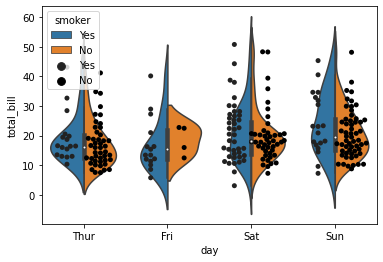

In [50]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='smoker',dodge=True,color='black')
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

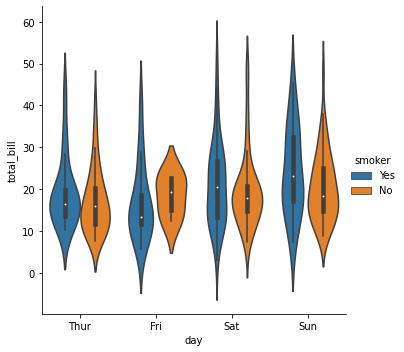

In [58]:
#sns.factorplot(x='day',y='total_bill',data=tips,hue='smoker',kind='bar')
sns.catplot(x='day',y='total_bill',data=tips,hue='smoker',kind='violin') #bar

In [60]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [65]:
tc=tips.corr()

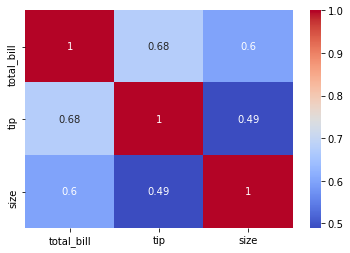

In [69]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [72]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

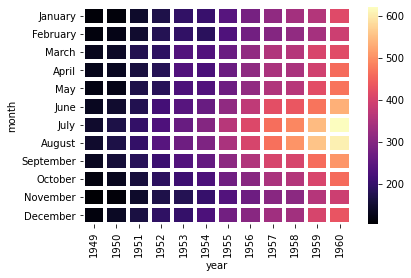

In [79]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=3)

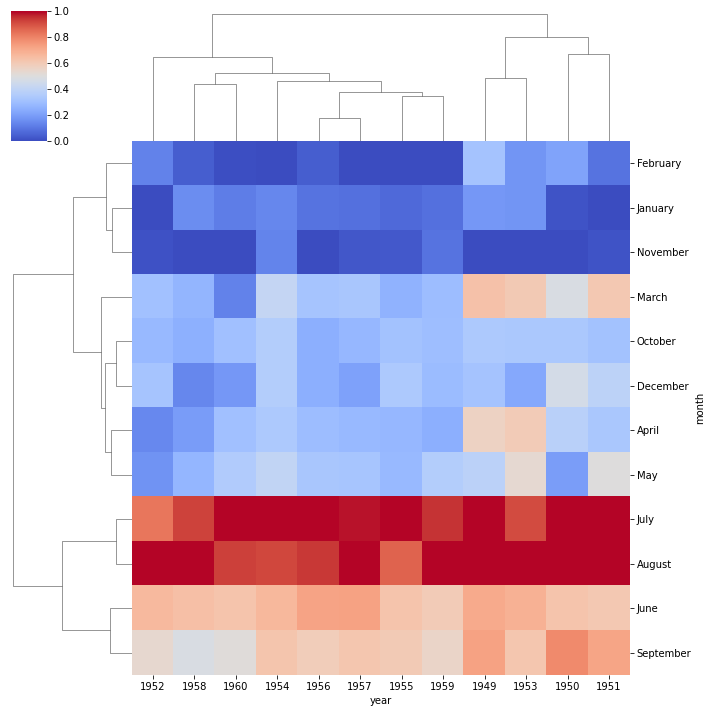

In [84]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [85]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

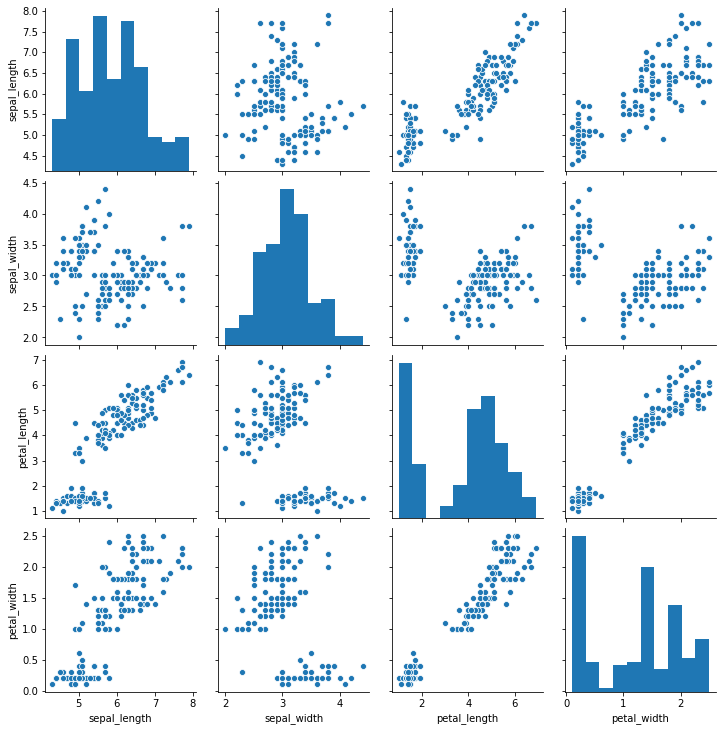

In [87]:
sns.pairplot(iris)

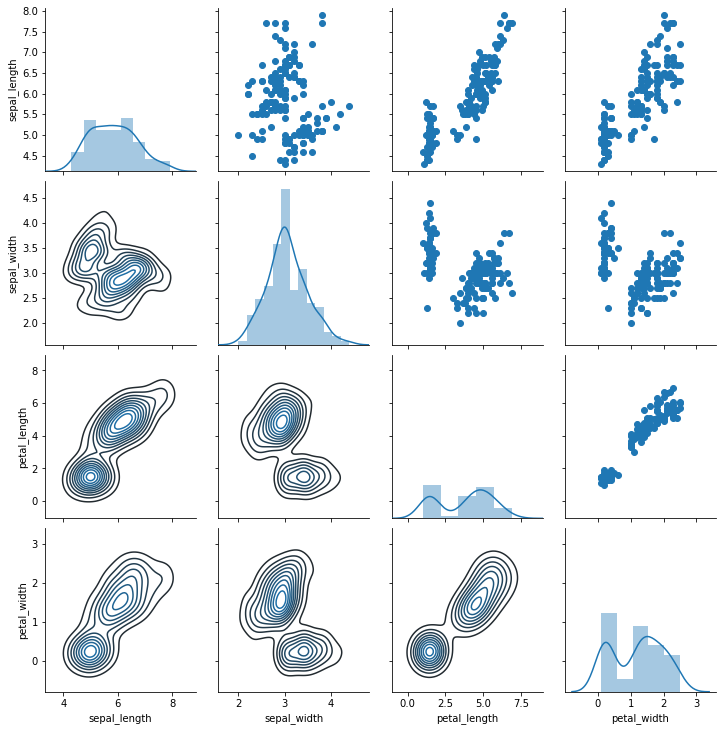

In [93]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

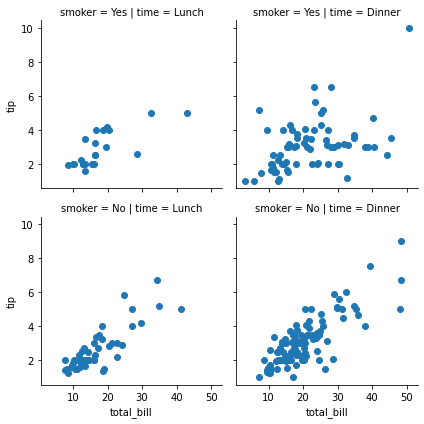

In [97]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
#g.map(sns.distplot,'total_bill')
g.map(plt.scatter,'total_bill','tip')

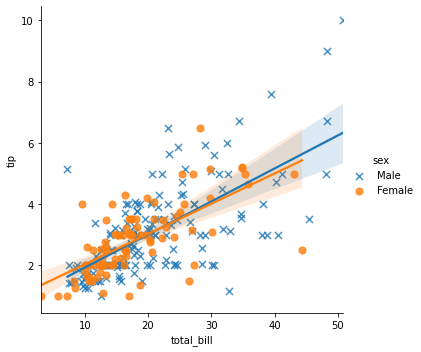

In [104]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',
           markers=['x','o'],scatter_kws={'s':50})

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


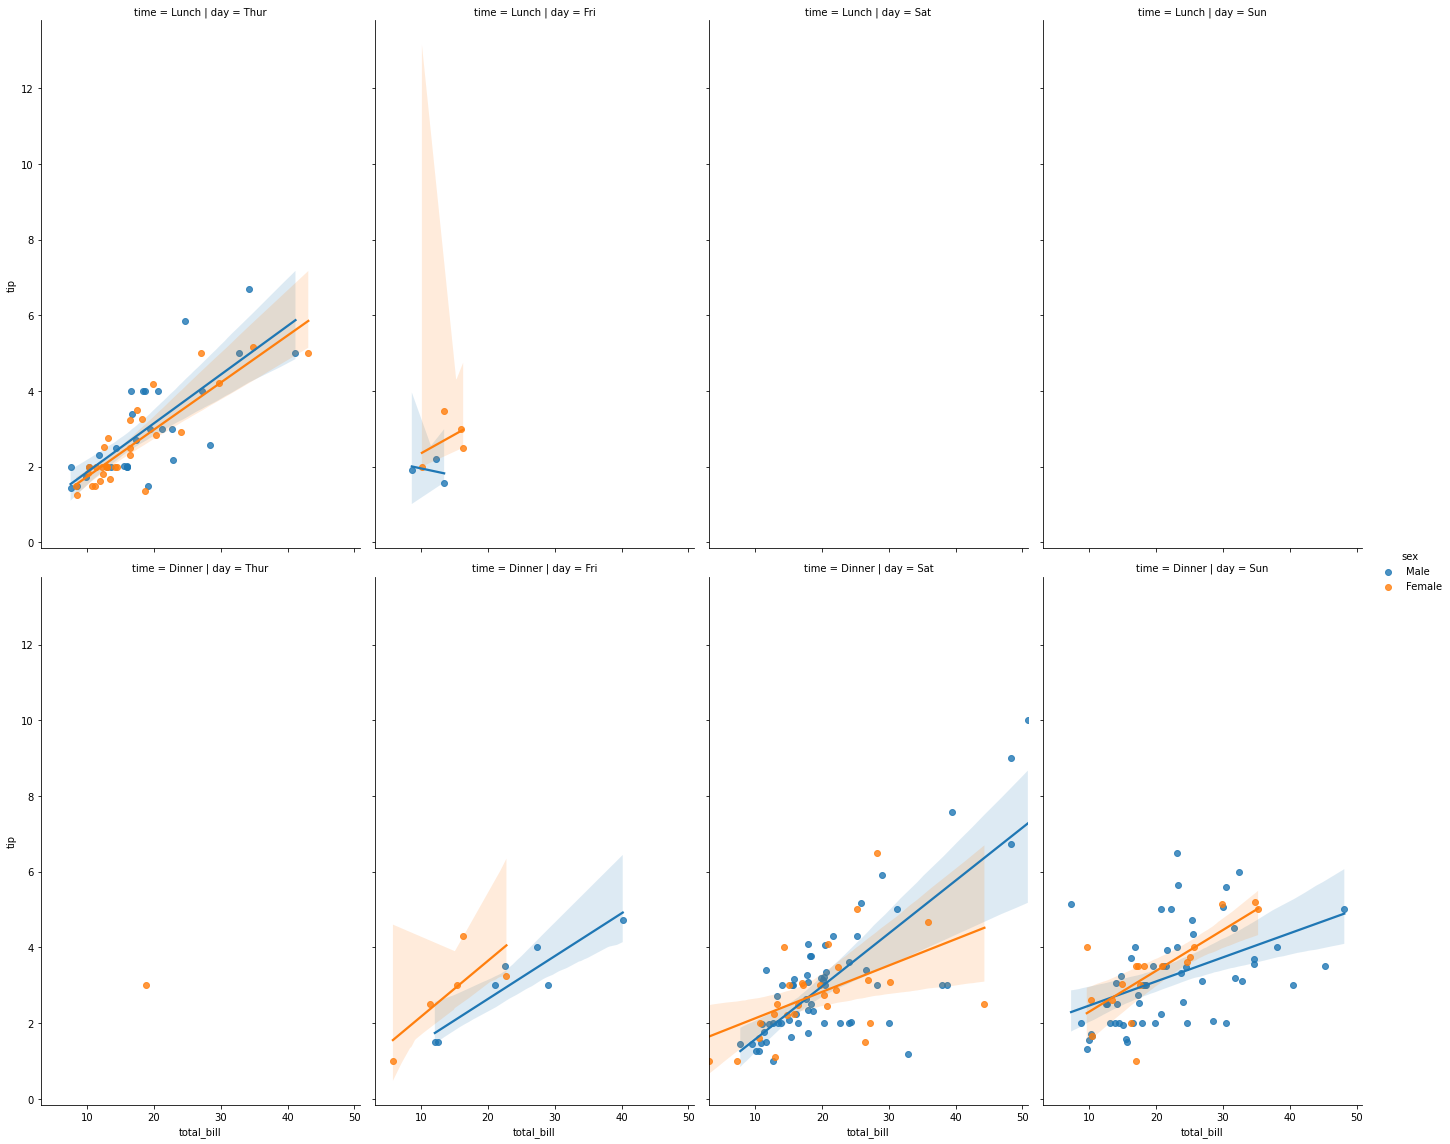

In [113]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex',
          aspect=0.6,size=8)

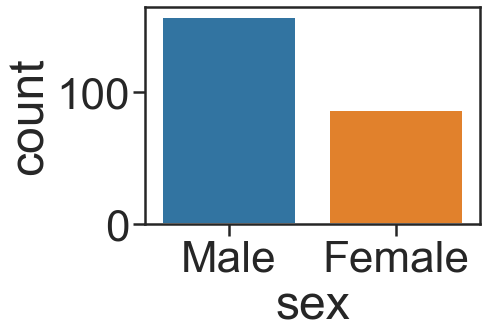

In [132]:
sns.set_context('poster',font_scale=2) #'notebook'
#plt.figure(figsize=(12,3))
#sns.set_style('ticks')#'whitegrid'
#sns.despine(left=True,bottom=True)
sns.countplot(x='sex',data=tips)

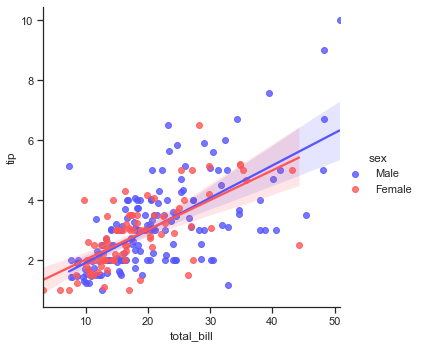

In [138]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')

In [139]:
sns.set_style('whitegrid')
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


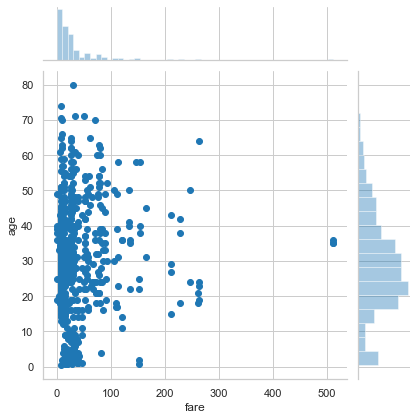

In [143]:
sns.jointplot(x='fare',y='age',data=titanic)

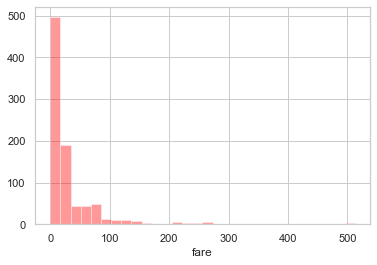

In [167]:
sns.distplot(titanic['fare'],kde=False,color='red',bins=30)

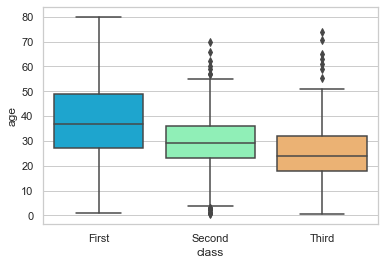

In [168]:
sns.boxplot(x='class',y='age',data=titanic, palette='rainbow')

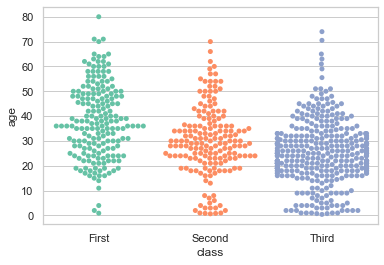

In [169]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

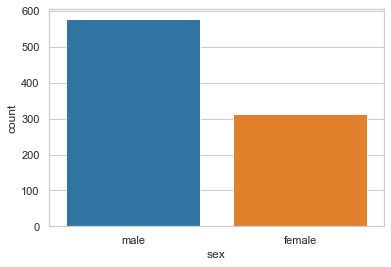

In [153]:
sns.countplot(x='sex',data=titanic)

Text(0.5, 1.0, 'titanic_corr')

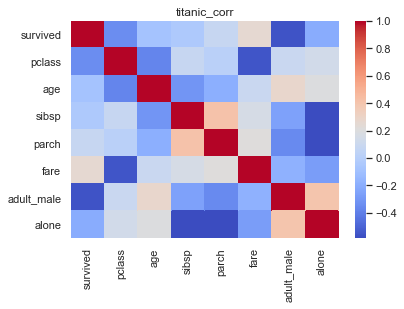

In [170]:
tc1=titanic.corr()
sns.heatmap(tc1,cmap='coolwarm')
plt.title('titanic_corr')

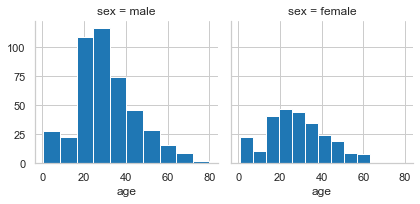

In [176]:
g=sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')